In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from PIL.Image import *
import random

import matplotlib.image as mpimg

In [2]:
## Creer votre propre Type de données abstrait Couleur sous python avec les caractériistiques suivants:
class Couleur:
    '''
    Constructeur à 3 paramétres qui represente les valeurs entiéres des différentes couleurs
    '''
    def __init__(self, R, G,B,name = None):
        self.R=R
        self.G=G
        self.B=B
        
    '''
    Creer une couleur à partir d'une liste
    '''
    @staticmethod
    def creerCouleur(listeRGB):
        red=listeRGB[0]
        green=listeRGB[1]
        blue=listeRGB[2]
        couleur=Couleur(red,green,blue)
        return couleur
            
    
    '''
    Recupération de l'intensite de la couleur rouge
    '''
    def getR(self):
        return self.R
    '''
    Recupération de l'intensite de la couleur verte
    '''
    def getG(self):
        return self.G
    '''
    Recupération de l'intensite de la couleur verte
    '''
    def getB(self):
        return self.B
    '''
    Version brillante de cet objet couleur
    Il faut caculer le meme pourcentage de R,G,B
    Ajouter ces valeurs aux valeurs R,G,B de l'objet couleur originel
    Retourne un objet couleur
    '''
    def brighter(self,pourcentage):
        self.R+=pourcentage
        self.G+=pourcentage
        self.B+=pourcentage
    '''
    Version sombre de cet objet couleur
    
    Il suffit de multiplier toutes les composantes R, G, B par le pourcentage passé en paramétre
    
    https://graphicdesign.stackexchange.com/questions/75417/how-to-make-a-given-color-a-bit-darker-or-lighter
    
    Retourne un objet couleur
    '''
    def darker(self,pourcentage):
        self.R=self.R*pourcentage
        self.G=self.G*pourcentage
        self.B=self.B*pourcentage
        return self
    '''
    Chaine de caractére representant cet objet couleur
    Retourne un string contenant les valeurs des composantes R,G,B
    '''
    def toString(self):
        return "RGB("+str(self.R)+","+str(self.G)+","+str(self.B)+")"
    '''
    Comparaison de cet objet couleur avec color
    Retourne un booloean
    '''
    def equals(self,color):
        return self.getR() == color.getR() and self.getG() == color.getG() and self.getB() == color.getB()
    '''
     Calcul de la Luminance. La qualité des 
     images dans les écrans plasmas modernes est une combinaison linéaire des trois couleurs et est définie par
     l'equation Y = 0.299r + 0.587g + 0.114b
     
    '''
    def luminance(self):
        return (0.299*self.R)+(0.587*self.G)+(0.114*self.B)
    '''
     Calcul du niveau de gris. Il faut remplacer chaque intensité de couleur par la valeur entiére de la luminance.
     Il faudra créer une nouvelle couleur avec des intensités égales à la luminance
    '''
    def grayScale(self):
        self.R=self.G=self.B=self.luminance()
        return self
        
    '''
     Compatibilité deux couleurs. Deux couleurs sont compatibles si la différence de leur luminance fait au moins 128
     Retourne un boolean qui vaut true si les deux couleurs sont compatibles et false sinon
    '''
    def compatible(self, couleur):
        return self.luminance()==couleur.luminance()
    '''
     Addition de couleur
    '''
    def add(self, col):
        self.R+=col.R
        self.G+=col.G
        self.B+=col.B
        return self
    '''
    Fonction permettant d'afficher une couleur dans un cercle. Vous pouvez l'utiliser.
    '''
    def showColor(self):
        fig, ax = plt.subplots()
        # create a grid to plot the color
        grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T
        # add a circle
        circle = mpatches.Circle(grid[0], 0.05, ec="none",color=(self.R/255,self.G/255,self.B/255))
        ax.add_patch(circle)
        #ax.add_line(line)

        plt.axis('equal')
        plt.axis('off')
        plt.tight_layout()

        plt.show()

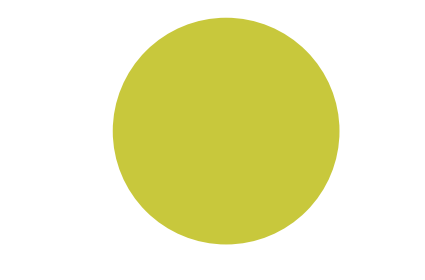

212


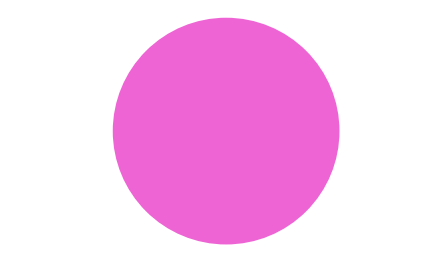

In [3]:
color=Couleur(100,100,30)
bw=color.darker(2)
bw.showColor()
liste=[238,100,212,.1]
col=bw.creerCouleur(liste)
print(col.B)
col.showColor()

In [4]:
## Image Processing
class Picture:
    '''
    Creer une image à partir d'un fichier en utilisant la fonction imread() de matplotlig.image ou plus généralement la 
    librairie Pillow
    '''
    def __init__(self,nomFichier = None,H = None, W = None):
        if nomFichier == None:
                
            '''
            Creer une image blanche de hauteur H et de largeur W
            '''
            self.H = H
            self.W = W
            self.img = np.zeros((H,W,3))
        else:
                
            '''
            Creer une image à partir d'un fichier
            '''
            self.img = mpimg.imread(nomFichier)
            self.H = self.img.shape[1]
            self.W = self.img.shape[0]
        
    
    '''
    Retourne la hauteur H
    '''
    def getH(self):
        return self.H
    '''
    Retourne la largeur W
    '''
    def getW(self):
        return self.W
    '''
    Retourne le tableau numpy constituant l'image
    '''
    def getImg(self):
        return np.array(self.img)
    '''
    Retourne les couleurs R,G, B sous forme de liste du pixel à la ligne row et la colonne col
    '''
    def getCouleur(self,row, col):
        return self.img[row,col]
         
    '''
    Modifie les couleurs R,G,B du pixel à la ligne row et la colonne col
    '''
    def setCouleur(self,row, col,couleur):
        self.img[row,col]=couleur        
        return self
    '''
    Affiche une image
    '''
    def affiche(self):
        plt.imshow(self.img)
    '''
    Sauve  une image dans un fichier png
    '''
    def save(self, nomFichier):
        
        plt.imsave(nomFichier, self.img, format = 'png')
    

[1. 1. 1. 1.]
[0.  0.  0.  0.1]


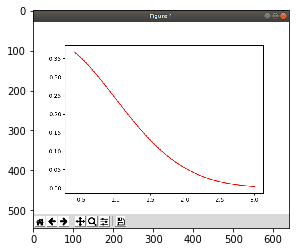

In [5]:
image=Picture('c.png',200,400)
image.affiche()
col=(0,0,0,.1)
print(image.getCouleur(296,300))
image.setCouleur(296,300,col)
print(image.getCouleur(296,300))
image.affiche()

In [101]:
## Image processing
class ImageProcessing:
    
    def __init__(self,image):
        self.image = image
    '''
    Helper function
    '''
    def __calGray__(listePixel):
        A = math.floor(0.299*listePixel[0] + 0.587*listePixel[1] + 0.114*listePixel[2])
        return np.ndarray([A,A,A])
        
    '''
     Transformer en grayscale et visualiser l'image et sa transformée
     Appliquer les fonctions map, reduce ou filter pour reduire la complexite
    '''
    def transformGrayscaleMap(self):
        grayPicture = Picture(None,self.image.W,self.image.H) 
        grayPicture.img=self.image.img
        grayPicture.img = map(self.__calGray__,self.image.img[:,:])
        return grayPicture
        
    '''
     Transformer en grayscale et visualiser l'image et sa transformée
     Une classe gloutonne avec des boucles for
    '''
    def transformGrayscaleGlouton(self):
        image2=Picture(None,550,1000)
        image2.img=np.copy(self.image.img)
        for y in range(self.image.H-1):
            for x in range(self.image.W-1):
                col = self.image.getCouleur(x,y)
                color=Couleur(col[0],col[1],col[2])
                lum=color.luminance()
                grayColor=color.grayScale()
                newColor=(grayColor.R,grayColor.G,grayColor.B,1.)
                image2.setCouleur(x,y,newColor)
  
        plt.subplot(2,2,1)
        image.affiche()
        plt.title('grayscale')
    
        plt.subplot(2,2,2)
        self.image.affiche()
        plt.title('original')
  
        
    '''
     Creer une image en inversant les proportions de l'image source. Afficher les deux images
    '''
    def transformScale(self):
        image=Picture(None,100,200)
        image.img=np.copy(self.image.img)
        for i in range(1,self.image.W-1):
            for j in range(1,self.image.H-1):
                sourceCol = self.image.getCouleur(i,j)
                image.setCouleur(i, j//2, sourceCol)
        plt.subplot(2,2,1)
        image.affiche()
        plt.title('scale')
    
        plt.subplot(2,2,2)
        self.image.affiche()
        plt.title('original')
        
    '''
    Separer les couleurs d'une image et visualiser les trois couleurs
    '''
    def separerCouleur(self):
        R=Picture(None,400,500)
        G=Picture(None,400,500)
        B=Picture(None,400,500)
        R.img = np.copy(self.image.img)
        R.img[:,:,1] = 0
        R.img[:,:,2] = 0
       
        G.img = np.copy(self.image.img)
        G.img[:,:,0] = 0
        G.img[:,:,2] = 0
        
        B.img = self.image.img
        B.img[:,:,0] = 0
        B.img[:,:,1] = 0

        

        plt.subplot(2,3,1)
        R.affiche()
        plt.title('RED')

        plt.subplot(2,3,2)
        G.affiche()
        plt.title('GREEN')

        plt.subplot(2,3,3)
        B.affiche()
        plt.title('BLUE')
        

    '''
    Filtre de glace: Affecter à chaque pixel p la couleur d'un pixel voisin choisi alétoirement
    (Les coordonnées du pixel et de p doivent différer d'au plus 5).
    Afficher les deux images 
    '''
    def filtreGlass(self):
        image=Picture(None,1600,800)
        image.img=np.copy(self.image.img)
        for i in range(self.image.W-1):
            for j in range(self.image.H-1):
                haut = image.getCouleur(i, j - 5) # recuperation du pixel du haut\n",
                bas = image.getCouleur(i, j + 1) # recuperation du pixel du bas\n",
                gauche = image.getCouleur(i - 5, j) # recuperation du pixel de gauche\n",
                droite =image.getCouleur(i + 1, j) # recuperation du pixel de droite\n",
                liste=[haut,bas,gauche,droite]
                voiz=random.choice(liste)
                image.setCouleur(i,j,voiz)
       
        plt.subplot(2,2,1)
        image.affiche(),
        plt.title('filtreGlass')
        plt.subplot(2,2,2)
        self.image.affiche()
        plt.title('original')  
            
            
        
        
    def __convolve__(self,kernel,matrice):
        som=0
        for i in range(len(matrice)):
            for j in range(len(matrice)):
                for x in range(3):
                    for y in range(3):
                        if i==x and j==y:
                            som+=matrice[i][j]*kernel[x][y]
                            
        return som
            
               

    
    def filtreMoyen(self):
        image=Picture(None,100,100)
        image.img=np.copy(self.image.img)
        for i in range(1,self.image.W-1):
            for j in range(1,self.image.H-1):
                pix1 = self.image.getCouleur(i-1,j - 1)
                pix2 = self.image.getCouleur(i, j - 1)
                pix3 = self.image.getCouleur(i+1, j - 1)
                pix4 = self.image.getCouleur(i - 1, j)
                pix5 = self.image.getCouleur(i, j) 
                pix6 = self.image.getCouleur(i + 1, j)
                pix7 = self.image.getCouleur(i-1, j + 1)
                pix8 = self.image.getCouleur(i, j + 1)
                pix9 = self.image.getCouleur(i+1, j + 1)
                R=(pix1[0]+pix2[0]+pix3[0]+pix4[0]+pix5[0]+pix6[0]+pix7[0]+pix8[0]+pix9[0])/9
                G=(pix1[1]+pix2[1]+pix3[1]+pix4[1]+pix5[1]+pix6[1]+pix7[1]+pix8[1]+pix9[1])/9
                B=(pix1[2]+pix2[2]+pix3[2]+pix4[2]+pix5[2]+pix6[2]+pix7[2]+pix8[2]+pix9[2])/9
                col=(R,G,B,1.)
                image.setCouleur(i,j,col)
        plt.subplot(2,2,1)
        image.affiche()
        plt.title('filtreMoyen')
        plt.subplot(2,2,2)
        self.image.affiche()
        plt.title('original')
    def filtreMedian(self):
        image=Picture(None,100,100)
        image.img=np.copy(self.image.img)
        for i in range (1,self.image.W-1):
            for j in range(1,self.image.H-1):
                pix1 =self.image.getCouleur(i-1,j - 1)
                pix2 = self.image.getCouleur(i, j - 1)
                pix3 = self.image.getCouleur(i+1, j - 1)
                pix4 = self.image.getCouleur(i - 1, j)
                pix5 = self.image.getCouleur(i, j) 
                pix6 = self.image.getCouleur(i + 1, j)
                pix7 = self.image.getCouleur(i-1, j + 1)
                pix8 = self.image.getCouleur(i, j + 1)
                pix9 = self.image.getCouleur(i+1, j + 1)
                listeR=[pix1[0],pix2[0],pix3[0],pix4[0],pix5[0],pix6[0],pix7[0],pix8[0],pix9[0]]
                listeG=[pix1[1],pix2[1],pix3[1],pix4[1],pix5[1],pix6[1],pix7[1],pix8[1],pix9[1]]
                listeB=[pix1[2],pix2[2],pix3[2],pix4[2],pix5[2],pix6[2],pix7[2],pix8[2],pix9[2]]
                listeR.sort()
                listeG.sort()
                listeB.sort()
                R=listeR[4]
                G=listeG[4]
                B=listeB[4]
                col=(R,G,B,1.)
                image.setCouleur(i,j,col)
        plt.subplot(2,2,1)
        image.affiche()
        plt.title('filtreMedian')
        plt.subplot(2,2,2)
        self.image.affiche()
        plt.title('original')
    
    def filtreLissageConservateur(self):
        image=Picture(None,100,100)
        image.img=np.copy(self.image.img)
        for i in range (1,self.image.W-1):
            for j in range(1,self.image.H-1):
                pix1 = self.image.getCouleur(i-1,j - 1)
                pix2 = self.image.getCouleur(i, j - 1)
                pix3 = self.image.getCouleur(i+1, j - 1)
                pix4 = self.image.getCouleur(i - 1, j)
                pix5 = self.image.getCouleur(i, j) 
                pix6 = self.image.getCouleur(i + 1, j)
                pix7 = self.image.getCouleur(i-1, j + 1)
                pix8 = self.image.getCouleur(i, j + 1)
                pix9 = self.image.getCouleur(i+1, j + 1)
                listeR=[pix1[0],pix2[0],pix3[0],pix4[0],pix6[0],pix7[0],pix8[0],pix9[0]]
                listeG=[pix1[1],pix2[1],pix3[1],pix4[1],pix6[1],pix7[1],pix8[1],pix9[1]]
                listeB=[pix1[2],pix2[2],pix3[2],pix4[2],pix6[2],pix7[2],pix8[2],pix9[2]]
                
                if(pix5[0]>max(listeR)):
                    pix5[0]=max(listeR)
                elif(pix5[0]<min(listeR)):
                    pix5[0]=min(listeR)
                    
                if(pix5[1]>max(listeG)):
                    pix5[1]=max(listeG)
                elif(pix5[1]<min(listeG)):
                    pix5[1]=min(listeG)
               
                if(pix5[2]>max(listeB)):
                    pix5[2]=max(listeB)
                elif(pix5[2]<min(listeB)):
                    pix5[2]=min(listeB)
               
                col=(pix5[0],pix5[1],pix5[2],1.)
                image.setCouleur(i,j,col)
        plt.subplot(2,2,1)
        image.affiche()
        plt.title('filtreLissage')
        plt.subplot(2,2,2)
        self.image.affiche()
        plt.title('original')
    
    def FiltreGaussien(self):
        taille=(3,3)
        sigma=1.5
        m,n = [(s-1.)/2. for s in taille]
        y,x = np.ogrid[-m:m+1,-n:n+1]
        kernel = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
        kernel[ kernel < np.finfo(kernel.dtype).eps*kernel.max() ] = 0
        somme = kernel.sum()
        if somme != 0:
            kernel /= somme
        image=Picture(None,100,100)
        image.img=np.copy(self.image.img)
        for i in range (1,self.image.W-1):
            for j in range(1,self.image.H-1):
                pix1 = self.image.getCouleur(i-1,j - 1)
                pix2 = self.image.getCouleur(i, j - 1)
                pix3 = self.image.getCouleur(i+1, j - 1)
                pix4 = self.image.getCouleur(i - 1, j)
                pix5 = self.image.getCouleur(i, j)
                pix6 = self.image.getCouleur(i + 1, j)
                pix7 = self.image.getCouleur(i-1, j + 1)
                pix8 = self.image.getCouleur(i, j + 1)
                pix9 = self.image.getCouleur(i+1, j + 1)
                matR=[[pix1[0],pix2[0],pix3[0]],[pix4[0],pix5[0],pix6[0]],[pix7[0],pix8[0],pix9[0]]]
                matG=[[pix1[1],pix2[1],pix3[1]],[pix4[1],pix5[1],pix6[1]],[pix7[1],pix8[1],pix9[1]]]
                matB=[[pix1[2],pix2[2],pix3[2]],[pix4[2],pix5[2],pix6[2]],[pix7[2],pix8[2],pix9[2]]]
                red=self.__convolve__(kernel,matR)
                green=self.__convolve__(kernel,matG)
                blue=self.__convolve__(kernel,matB)
                col=(red,green,blue,1.)
                image.setCouleur(i,j,col)
        plt.subplot(2,2,1)
        image.affiche()
        plt.title('gaussian filter')
        plt.subplot(2,2,2)
        self.image.affiche()
        plt.title('original')
    def FiltreLap(self):
        image=Picture(None,100,100)
        image.img=np.copy(self.image.img)
        kernel=[[0,-1,0],[-1,4,-1],[0,-1,0]]
        for i in range (1,self.image.W-1):
            for j in range(1,self.image.H-1):
                pix1 = self.image.getCouleur(i-1,j - 1)
                pix2 = self.image.getCouleur(i, j - 1)
                pix3 = self.image.getCouleur(i+1, j - 1)
                pix4 = self.image.getCouleur(i - 1, j)
                pix5 = self.image.getCouleur(i, j)
                pix6 = self.image.getCouleur(i + 1, j)
                pix7 = self.image.getCouleur(i-1, j + 1)
                pix8 = self.image.getCouleur(i, j + 1)
                pix9 = self.image.getCouleur(i+1, j + 1)
                matR=[[pix1[0],pix2[0],pix3[0]],[pix4[0],pix5[0],pix6[0]],[pix7[0],pix8[0],pix9[0]]]
                matG=[[pix1[1],pix2[1],pix3[1]],[pix4[1],pix5[1],pix6[1]],[pix7[1],pix8[1],pix9[1]]]
                matB=[[pix1[2],pix2[2],pix3[2]],[pix4[2],pix5[2],pix6[2]],[pix7[2],pix8[2],pix9[2]]]
                R=self.__convolve__(kernel,matR)
                G=self.__convolve__(kernel,matG)
                B=self.__convolve__(kernel,matB)
                col=(R,G,B,1.)
                image.setCouleur(i,j,col)
        plt.subplot(2,2,1)
        image.affiche()
        plt.title('Laplacian filter')
        plt.subplot(2,2,2)
        self.image.affiche()
        plt.title('original')
    def unsharpFilter(self):
        image=Picture(None,100,100)
        image.img=np.copy(self.image.img)
        kernel=[[0,-1,0],[-1,5,-1],[0,-1,0]]
        for i in range (1,self.image.W-1):
            for j in range(1,self.image.H-1):
                pix1 = self.image.getCouleur(i-1,j - 1)
                pix2 = self.image.getCouleur(i, j - 1)
                pix3 = self.image.getCouleur(i+1, j - 1)
                pix4 = self.image.getCouleur(i - 1, j)
                pix5 = self.image.getCouleur(i, j)
                pix6 = self.image.getCouleur(i + 1, j)
                pix7 = self.image.getCouleur(i-1, j + 1)
                pix8 = self.image.getCouleur(i, j + 1)
                pix9 = self.image.getCouleur(i+1, j + 1)
                matR=[[pix1[0],pix2[0],pix3[0]],[pix4[0],pix5[0],pix6[0]],[pix7[0],pix8[0],pix9[0]]]
                matG=[[pix1[1],pix2[1],pix3[1]],[pix4[1],pix5[1],pix6[1]],[pix7[1],pix8[1],pix9[1]]]
                matB=[[pix1[2],pix2[2],pix3[2]],[pix4[2],pix5[2],pix6[2]],[pix7[2],pix8[2],pix9[2]]]
                R=self.__convolve__(kernel,matR)
                G=self.__convolve__(kernel,matG)
                B=self.__convolve__(kernel,matB)                
                col=(R,G,B,1.)
                image.setCouleur(i,j,col)
        plt.subplot(2,2,1)
        image.affiche()
        plt.title('Unsharp filter')
        plt.subplot(2,2,2)
        self.image.affiche()
        plt.title('original')
    def frequencyFilter(self):
        image=Picture(None,100,100)
        image.img=np.copy(self.image.img)
        kernel=[[1,1,1],[1,4,1],[1,1,1]]
        for i in range (1,self.image.W-1):
            for j in range(1,self.image.H-1):
                pix1 = self.image.getCouleur(i-1,j - 1)
                pix2 = self.image.getCouleur(i, j - 1)
                pix3 = self.image.getCouleur(i+1, j - 1)
                pix4 = self.image.getCouleur(i - 1, j)
                pix5 = self.image.getCouleur(i, j)
                pix6 = self.image.getCouleur(i + 1, j)
                pix7 = self.image.getCouleur(i-1, j + 1)
                pix8 = self.image.getCouleur(i, j + 1)
                pix9 = self.image.getCouleur(i+1, j + 1)
                matR=[[pix1[0],pix2[0],pix3[0]],[pix4[0],pix5[0],pix6[0]],[pix7[0],pix8[0],pix9[0]]]
                matG=[[pix1[1],pix2[1],pix3[1]],[pix4[1],pix5[1],pix6[1]],[pix7[1],pix8[1],pix9[1]]]
                matB=[[pix1[2],pix2[2],pix3[2]],[pix4[2],pix5[2],pix6[2]],[pix7[2],pix8[2],pix9[2]]]
                R=self.__convolve__(kernel,matR)
                G=self.__convolve__(kernel,matG)
                B=self.__convolve__(kernel,matB)
                col=(R,G,B,1.)
                image.setCouleur(i,j,col)
        plt.subplot(2,2,1)
        image.affiche()
        plt.title('Frequency filter')
        plt.subplot(2,2,2)
        self.image.affiche()
        plt.title('original')


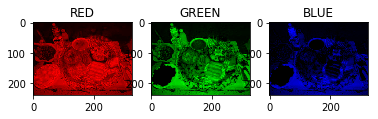

In [31]:
img=Picture('goute.png',550,1000)

trans=ImageProcessing(img)

trans.separerCouleur()


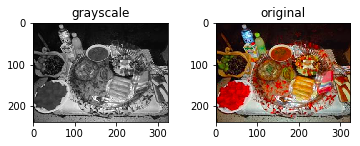

In [32]:
img=Picture('goute.png',550,1000)

trans=ImageProcessing(img)

trans.transformGrayscaleGlouton()


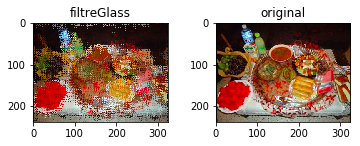

In [33]:
img=Picture('goute.png',550,1000)

trans=ImageProcessing(img)

trans.filtreGlass()

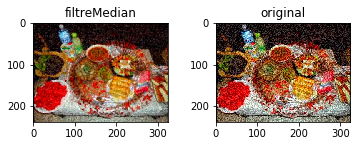

In [34]:
img=Picture('gouteBruit.png',550,1000)

trans=ImageProcessing(img)

trans.filtreMedian()

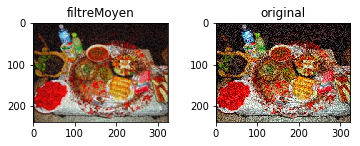

In [35]:
img=Picture('gouteBruit.png',550,1000)

trans=ImageProcessing(img)

trans.filtreMoyen()

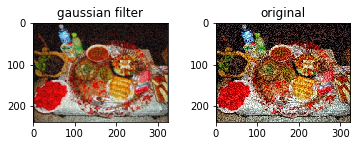

In [327]:
img=Picture('gouteBruit.png',550,1000)
img.affiche()
trans=ImageProcessing(img)

trans.FiltreGaussien()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


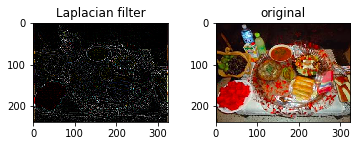

In [36]:
img=Picture('goute.png',550,1000)

trans=ImageProcessing(img)
trans.FiltreLap()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


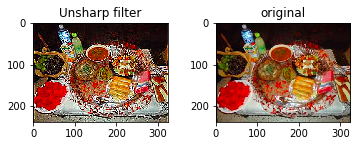

In [329]:
img=Picture('goute.png',550,1000)

trans=ImageProcessing(img)
trans.unsharpFilter()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


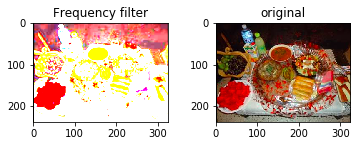

In [37]:
img=Picture('goute.png',550,1000)

trans=ImageProcessing(img)
trans.frequencyFilter()

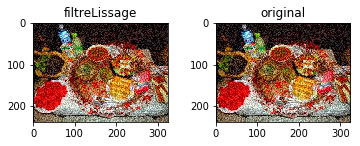

In [38]:
img=Picture('gouteBruit.png',550,1000)

trans=ImageProcessing(img)

trans.filtreLissageConservateur()